In [2]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#reading in the state abbreviations
path = '../keiko/statesAbbrev.csv'
statesAbbrev_df = pd.read_csv(path)
statesAbbrev_df.head(20)

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA
5,Colorado,Colo.,CO
6,Connecticut,Conn.,CT
7,Delaware,Del.,DE
8,District of Columbia,D.C.,DC
9,Florida,Fla.,FL


In [4]:
#list for state codes
state_codes = [x for x in statesAbbrev_df['Code']]

In [9]:

#creating a df dict to hold the state dfs, reading in the dfs
states_df_dict = {}
for x in range(10, 20):
    path = f'../sarah/google_trends/google_trends_csvs/state_csvs/US-{state_codes[x]}_cat_data.csv'
    states_df_dict[f'{state_codes[x]}_data_df'] = [pd.read_csv(path)]

In [10]:
#inspecting the keys (ie df names)
states_df_dict.keys()

dict_keys(['GA_data_df', 'HI_data_df', 'ID_data_df', 'IL_data_df', 'IN_data_df', 'IA_data_df', 'KS_data_df', 'KY_data_df', 'LA_data_df', 'ME_data_df'])

In [11]:
#test printing a df
print(state_codes[10])
states_df_dict[f'{state_codes[10]}_data_df'][0].head(10)

GA


,time,arts_entertainment,autos,beauty_fitness,books_lit,action_adventure,campaigns_elections,celebs,discrimination,entertainment_media,...,mobiles,online_vids,scifi_fantasy,sport_news,tv_shows,voice_vid_chat,weather,covid_cases,stay_at_home,mass_gathering_ban
0,2019-01-06,85,68,83,72,57,0,61,15,83,...,55,77,63,76,82,65,51,NaN,False,False
1,2019-01-13,85,71,88,85,72,0,61,17,85,...,57,85,48,67,85,48,64,NaN,False,False
2,2019-01-20,85,73,85,82,64,0,56,16,81,...,57,91,61,69,84,64,69,NaN,False,False
3,2019-01-27,89,75,87,85,63,0,69,22,75,...,59,90,53,70,85,79,100,NaN,False,False
4,2019-02-03,83,73,83,80,59,0,56,20,69,...,54,79,46,85,84,65,54,NaN,False,False
5,2019-02-10,80,69,78,78,54,0,54,25,70,...,55,78,48,52,79,63,63,NaN,False,False
6,2019-02-17,84,72,84,72,60,0,72,19,79,...,60,80,50,52,79,63,74,NaN,False,False
7,2019-02-24,87,77,85,84,57,0,60,25,70,...,57,77,56,54,81,77,63,NaN,False,False
8,2019-03-03,86,76,84,83,56,0,52,42,66,...,58,74,48,54,94,70,78,NaN,False,False
9,2019-03-10,81,74,82,71,53,0,53,15,63,...,54,80,46,61,80,60,56,NaN,False,False


In [13]:
col_names = list(states_df_dict[f'{state_codes[10]}_data_df'][0].columns)

In [14]:
col_names_for_max = [x for x in col_names if x not in ['time', 'covid_cases', 'stay_at_home', 'mass_gathering_ban']]

In [15]:
times_list = list(states_df_dict[f'{state_codes[10]}_data_df'][0]['time'])

In [16]:
times_list

['2019-01-06',
 '2019-01-13',
 '2019-01-20',
 '2019-01-27',
 '2019-02-03',
 '2019-02-10',
 '2019-02-17',
 '2019-02-24',
 '2019-03-03',
 '2019-03-10',
 '2019-03-17',
 '2019-03-24',
 '2019-03-31',
 '2019-04-07',
 '2019-04-14',
 '2019-04-21',
 '2019-04-28',
 '2019-05-05',
 '2019-05-12',
 '2019-05-19',
 '2019-05-26',
 '2019-06-02',
 '2019-06-09',
 '2019-06-16',
 '2019-06-23',
 '2019-06-30',
 '2019-07-07',
 '2019-07-14',
 '2019-07-21',
 '2019-07-28',
 '2019-08-04',
 '2019-08-11',
 '2019-08-18',
 '2019-08-25',
 '2019-09-01',
 '2019-09-08',
 '2019-09-15',
 '2019-09-22',
 '2019-09-29',
 '2019-10-06',
 '2019-10-13',
 '2019-10-20',
 '2019-10-27',
 '2019-11-03',
 '2019-11-10',
 '2019-11-17',
 '2019-11-24',
 '2019-12-01',
 '2019-12-08',
 '2019-12-15',
 '2019-12-22',
 '2019-12-29',
 '2020-01-05',
 '2020-01-12',
 '2020-01-19',
 '2020-01-26',
 '2020-02-02',
 '2020-02-09',
 '2020-02-16',
 '2020-02-23',
 '2020-03-01',
 '2020-03-08',
 '2020-03-15',
 '2020-03-22',
 '2020-03-29',
 '2020-04-05',
 '2020-04-

In [17]:
def boxplot_printer(ind_no):
    all_data_df = states_df_dict[f'{state_codes[ind_no]}_data_df'][0]
    data_2019_df = all_data_df.iloc[:52, :]
    data_2020_df = all_data_df.iloc[52:, :]
    
    ax = all_data_df.boxplot(column=col_names_for_max, rot=65, figsize=(20,10))

    plt.title(f'2019+2020 data for {state_codes[ind_no]}')
    plt.xlabel('category')
    plt.ylabel('popularity(%)')
    plt.show()
    
    ax = data_2019_df.boxplot(column=col_names_for_max, rot=65, figsize=(20,10))

    plt.title(f'2019 data for {state_codes[ind_no]}')
    plt.xlabel('category')
    plt.ylabel('popularity(%)')
    plt.show()
    
    ax = data_2020_df.boxplot(column=col_names_for_max, rot=65, figsize=(20,10))

    plt.title(f'2020 data for {state_codes[ind_no]}')
    plt.xlabel('category')
    plt.ylabel('popularity(%)')
    plt.show()

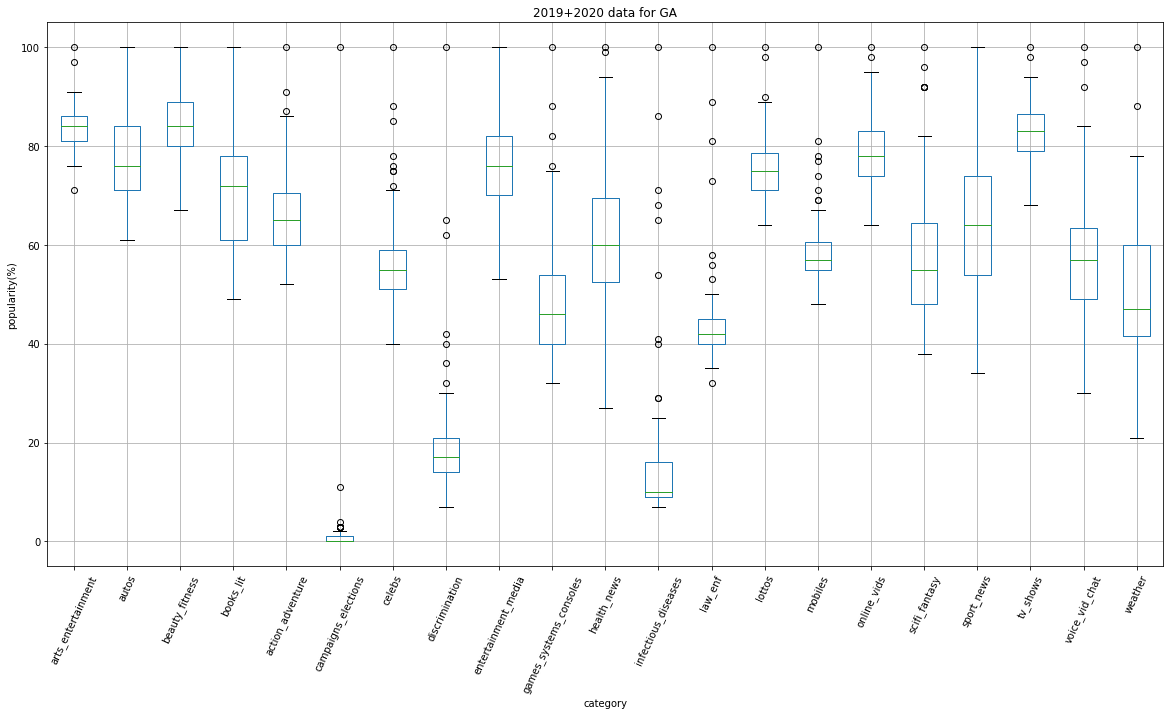

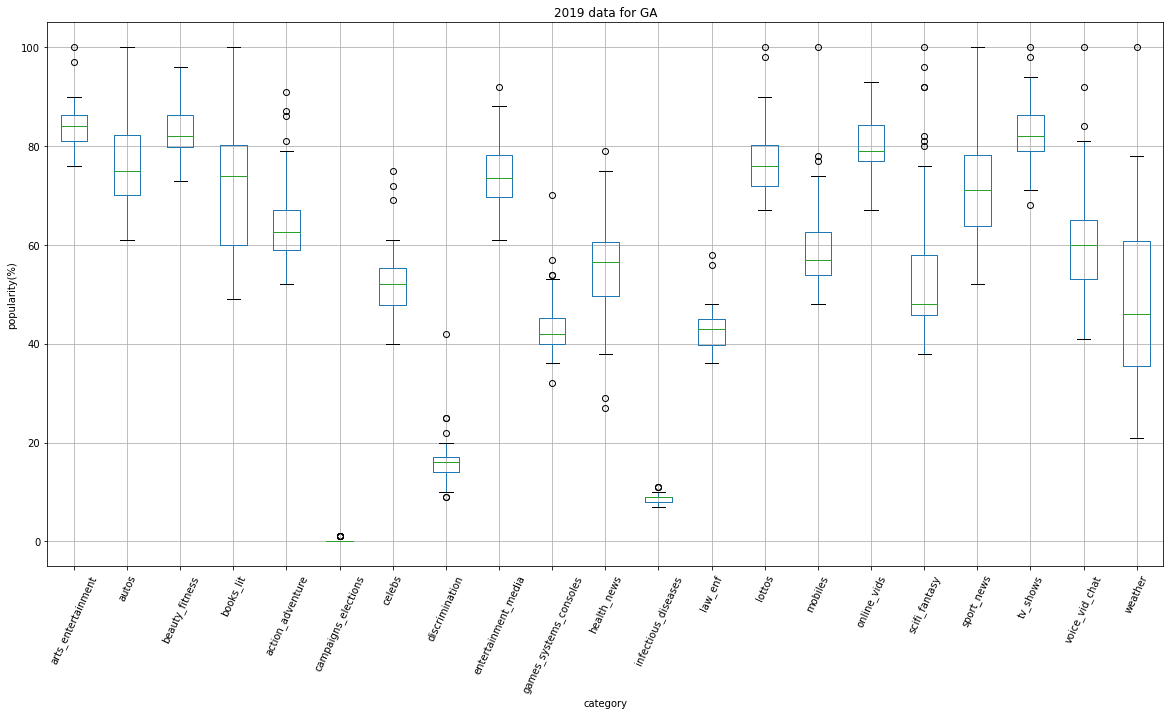

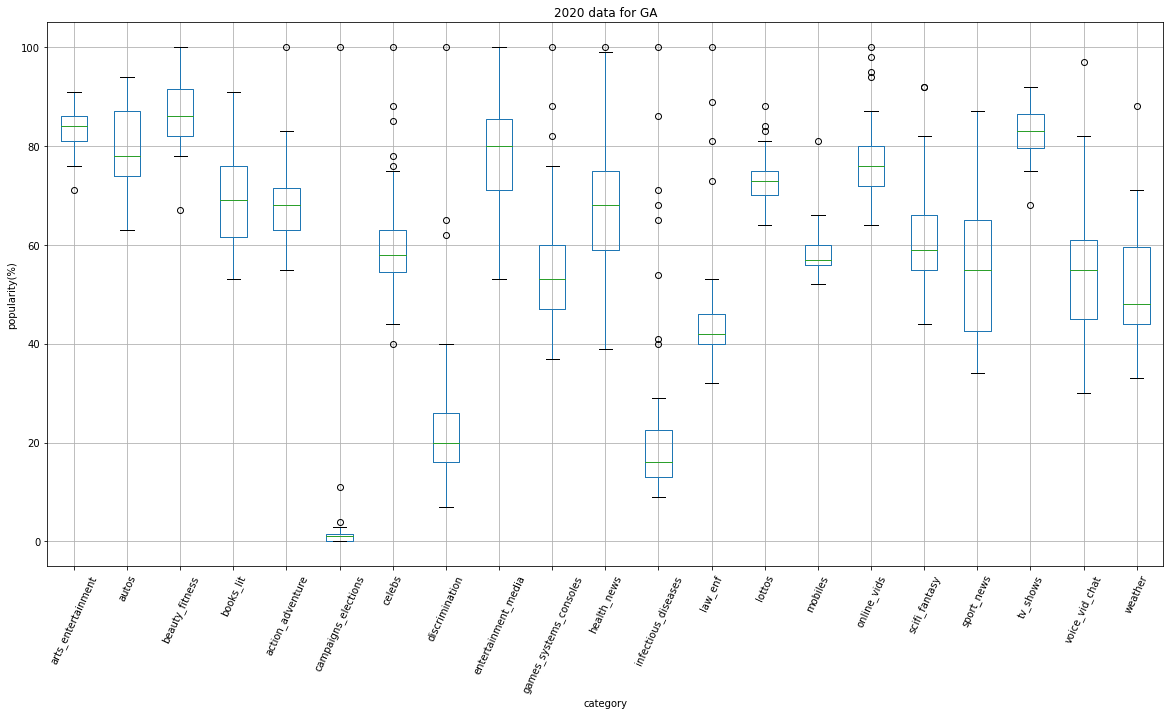

In [19]:
boxplot_printer(10)